<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Introduction to Machine Learning</h1><h2>Assignment</h2><h3>The Data School</h3></th>
    </tr>
</table>

## Student Name : Joseph Hencil Peter
### NRIC: S7967093F
#### Description:  ML Model to predict a customer will become a serious delinquent in terms of loan repayment.

## Objectives
##### After completing this assignment, you should be able to independently:
1. Perform Basic Data Preparation and Analysis on a Dataset
2. Train a Machine Learning Model Based on Problem Type
3. Fine Tune a Machine Learning Model
4. Evaluate a Machine Learning Model
5. Save a Trained Machine Learning Model for Future Use

## Problem Statement

Banks play a crucial role in market economies. They decide whether customers are eligible for loans and the terms of the loans. For markets and society to function, individuals and companies need access to credit.

Credit scoring algorithms, which make a guess at the probability of default, are adopted by banks to determine whether or not a loan should be granted. 

This assignment requires you to delve into the art of credit scoring, and predict whether a customer will become a serious delinquent in terms of loan repayment.

## Dataset

You will need the following files for this assignment:
1. loan_default.csv
2. Data Dictionary for loan_default

## Instructions

1. Based on what you have learnt in the course, perform necessary data preparation to get a clean dataset. 
2. Select a suitable Machine Learning model to solve the problem (i.e. classification / regression?).
3. Train, fine tune and evaluate your Machine Learning model(s).
4. Recommend the best model and save the model as a "pickle" file for future deployment.

The template below has been provided to guide you in the training of your Machine Learning model. Feel free to include more steps where necessary to achieve the goal of the assignment.

## Step 1: Import Data and Perform Data Preparation

In [1]:
#import libraries
#for dataframe and array
import pandas as pd
import numpy as np

#modelling libraries 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import random

#visualization libraries 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#saving trainined models 
import joblib

#### 1.1 Import Data from CSV file 

In [2]:
df = pd.read_csv("loan_default.csv")

In [3]:
df.head()

,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDelinquency
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,1
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0
2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,0
3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0
4,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,0


#### 2. Examine the state of the data 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 1   Age                                   150000 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 3   DebtRatio                             150000 non-null  float64
 4   MonthlyIncome                         120269 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 6   NumberOfTimes90DaysLate               150000 non-null  int64  
 7   NumberRealEstateLoansOrLines          150000 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 9   NumberOfDependents                    146076 non-null  float64
 10  SeriousDelinquency                    150000 non-null  int64  
dtype

#### 3. Basic Statistical Analysis

In [5]:
df.describe()

,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDelinquency
count,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000,150000.000000
mean,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222,0.066840
std,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086,0.249746
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000,0.000000
max,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000,1.000000


In [6]:
np.unique(df.SeriousDelinquency  )

array([0, 1], dtype=int64)

In [7]:
np.sum(df.SeriousDelinquency == 0)

139974

In [8]:
np.sum(df.SeriousDelinquency == 1)

10026

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Percentage of customers become serious delinquent ')

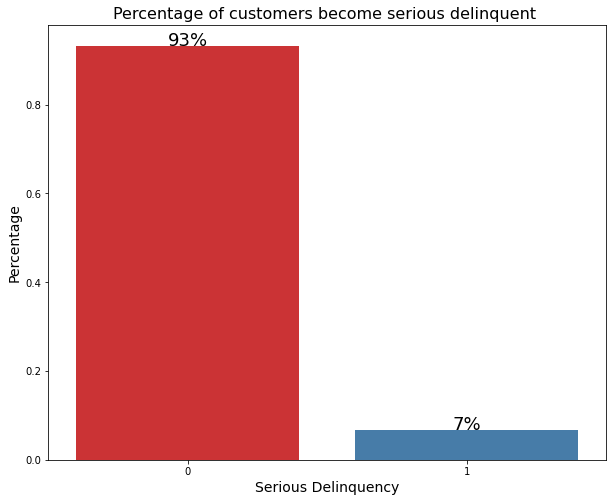

In [9]:

#Plot the target variable using bar chart
plt.figure(figsize=(10,8))
g = sns.barplot(df['SeriousDelinquency'], df['SeriousDelinquency'], palette='Set1', estimator=lambda x: len(x) / len(df) )

#Anotating the graph
for p in g.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        g.text(x+width/2, 
               y+height, 
               '{:.0%}'.format(height), 
               horizontalalignment='center',fontsize=18)

#Setting the labels
plt.xlabel('Serious Delinquency', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Percentage of customers become serious delinquent ', fontsize=16)

## Above chart clearly shows that the given data is imbalanced. 

## Step 2: Train a Suitable Machine Learning Model

###  Observation 
#### This is a classification problem
#### Logistic algorithm will be used to train and test the model

#### 2.1 Extract model Inputs(X) and output(y)

In [10]:
df.head(10)

,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDelinquency
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,1
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0
2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,0
3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0
4,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,0
5,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0,0
6,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0,0
7,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0,0
8,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN,0
9,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0,0


In [11]:
pd.isna(df).sum()

RevolvingUtilizationOfUnsecuredLines        0
Age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
SeriousDelinquency                          0
dtype: int64

#### NumberOfDependents  and MonthlyIncome  variables have NaN values.
####  assign 0 to NumberOfDependents if the value is NaN
#### assign the average (MonthlyIncome) value  to MonthlyIncome if the value is NaN


In [12]:
df['MonthlyIncome'] = df['MonthlyIncome'].replace(np.nan,  np.average(df[np.isnan(df['MonthlyIncome']) ==False] ))

In [13]:
df['NumberOfDependents'] = df['NumberOfDependents'].replace(np.nan,  0)

In [14]:
df_clean = df

In [15]:
dfy = df_clean.SeriousDelinquency # model output variable
dfX = df_clean.drop(['SeriousDelinquency'], axis=1) # model input variables


In [16]:
dfy.head()

0    1
1    0
2    0
3    0
4    0
Name: SeriousDelinquency, dtype: int64

In [17]:
dfX.head()

,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [18]:
#convert dfX and dfY from Pandas Dataframes type to Numpy arrays
X = dfX.values
y = dfy.values

In [19]:
#split the input and output into training (80%)  and test dataset (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 2.2 Train the base model

In [20]:
#train the base logistic regression model 
lgBase = LogisticRegression(random_state=42, solver='lbfgs', max_iter=200)
lgBase.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200, random_state=42)

#### 2.3 Evaluate the base model using holdout validation 

In [21]:
# Enter your code here:
#calculate the training accuracy 
train_accuracy = lgBase.score(X_train, y_train)
print("Training Accuracy: %.2f%%" %(train_accuracy * 100))

Training Accuracy: 93.31%


In [22]:
#calculate the testing accuracy
test_accuracy = lgBase.score(X_test, y_test)
print("Test Accuracy: %.2f%%" %(test_accuracy * 100))

Test Accuracy: 93.49%


## Step 3: Fine Tune the Base Model

#### statsmodel package has been used to calculate the p-value for each features. So non-significant features can be removed.


### 3.1 Use statsmodel 

In [23]:
#add a constant to the X_train dataset and rename it as X_train_sm
X_train_sm = sm.add_constant(X_train)

In [24]:
#prepare second model using statistical model's logit function 
lgSM = sm.Logit(y_train, X_train_sm).fit()

Optimization terminated successfully.
         Current function value: 0.225543
         Iterations 8


In [25]:
lgSM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               120000
Model:                          Logit   Df Residuals:                   119989
Method:                           MLE   Df Model:                           10
Date:                Sat, 25 Sep 2021   Pseudo R-squ.:                 0.08490
Time:                        23:54:45   Log-Likelihood:                -27065.
converged:                       True   LL-Null:                       -29576.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3486      0.047    -28.972      0.000      -1.440      -1.257
x1         -3.431e-05   7.07e-05     -0.485      0.628      -0.000       0.000
x2            -0.0292      0.001    -31.629      0.000      -0.031      -0.027
x3             0.5065      0.012     40.858      0.000       0.482       0.531
x4         -5.902e-05   1.32e-05     -4.457      0.000    -8.5e-05   -3.31e-05
x5         -2.965e-05   3.29e-06     -9.017      0.000   -3.61e-05   -2.32e-05
x6            -0.0048      0.003     -1.709      0.087      -0.010       0.001
x7             0.4966      0.017     29.178      0.000       0.463       0.530
x8             0.0604      0.012      5.091      0.000       0.037       0.084
x9            -0.9710      0.020    -48.960      0.000      -1.010      -0.932
x10            0.0932      0.010      9.093      0.000       0.073       0.113
==============================================================================
"""

In [26]:
dfX.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'Age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

#### select the features with p value smaller than 0.05
#### selected features: 'Age','NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 
####                    'MonthlyIncome','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines', 
####                     'NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents' 




### 3.2 Train and Evaluate the new model using using selected features 

In [27]:
dfX_new = dfX[['Age','NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']]


In [28]:
dfX_new.head(5)

,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,45,2,0.802982,9120.0,0,6,0,2.0
1,40,0,0.121876,2600.0,0,0,0,1.0
2,38,1,0.085113,3042.0,1,0,0,0.0
3,30,0,0.036050,3300.0,0,0,0,0.0
4,49,1,0.024926,63588.0,0,1,0,0.0


In [29]:
#initialize features for training
X_new = dfX_new.values
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.2, random_state=42)
lg_new = LogisticRegression(random_state=42, solver='lbfgs', max_iter=200)
lg_new.fit(X_train_new, y_train_new)

LogisticRegression(max_iter=200, random_state=42)

In [30]:
train_accuracy_new = lg_new.score(X_train_new, y_train_new)
print("Training Accuracy : %.2f%%" % (train_accuracy_new * 100))

Training Accuracy : 93.38%


In [31]:
test_accuracy_new = lg_new.score(X_test_new, y_test_new)
print("Test Accuracy : %.2f%%" % (test_accuracy_new * 100))

Test Accuracy : 93.45%


## Step 4: Evaluate the Models <a id='p4' />

#### 4.1 Create bar chart to compare the performance of both models 

In [32]:
# define x-axis and y-axis data values 
x_labels = ['BaseModel (all features)', 'NewModel (selected features)']
x_axis_train = [train_accuracy, train_accuracy_new]
x_axis_test = [test_accuracy, test_accuracy_new]

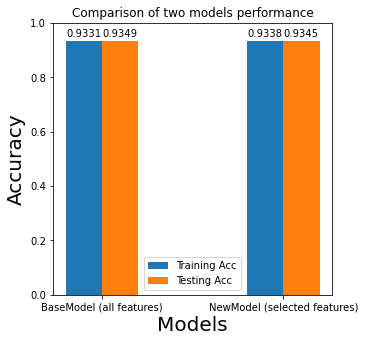

In [33]:
# set the label locations and with of the bars 
x= np.arange(len(x_labels))
width = 0.2

plt.figure(figsize=(5,5))

# plot side by side bars 
bar1 = plt.bar(x - width/2, x_axis_train, width, label='Training Acc')
bar2 = plt.bar(x + width/2, x_axis_test, width, label='Testing Acc')

#customize the plot

plt.title('Comparison of two models performance')
plt.ylabel('Accuracy', fontsize=20)
plt.xlabel('Models', fontsize=20)
plt.xticks(x, x_labels)
plt.ylim(bottom=0, top=1.0)
plt.legend()       


def labelBar(bars):
    for bar in bars:
        acc = bar.get_height()
        plt.annotate('{:.4f}'.format(acc),
                     xy=(bar.get_x() + bar.get_width()/2, acc),
                     xytext=(0,2),
                     textcoords="offset points",
                     ha="center", va="bottom")
labelBar(bar1)
labelBar(bar2)

#### 4.2 Evaluate the best model using confusion matrix 

#### 4.2.1 Use Base Model (Model 1) and perform prediction for evaluation 


In [34]:
y_pred = lgBase.predict(X_test)

#confusion matrix 
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
conf_matrix

array([[27976,    68],
       [ 1885,    71]], dtype=int64)

In [35]:
# print scores 

print("Accuracy : %.2f" % metrics.accuracy_score(y_test, y_pred))
print("Precisison : %.2f" % metrics.precision_score(y_test, y_pred))
print("Recall : %.2f" % metrics.recall_score(y_test, y_pred))
print("F1 score : %.2f" % metrics.f1_score(y_test, y_pred))

Accuracy : 0.93
Precisison : 0.51
Recall : 0.04
F1 score : 0.07


#### 4.2.2 Use New Model (Model 2) and perform prediction for evaluation 

In [36]:
#use second model and perform prediction 
y_pred_new = lg_new.predict(X_test_new)

#confusion matrix 
conf_matrix_new = metrics.confusion_matrix(y_test_new, y_pred_new)
conf_matrix_new

array([[27952,    92],
       [ 1873,    83]], dtype=int64)

In [37]:
# print scores 

print("Accuracy : %.2f" % metrics.accuracy_score(y_test_new, y_pred_new))
print("Precisison : %.2f" % metrics.precision_score(y_test_new, y_pred_new))
print("Recall : %.2f" % metrics.recall_score(y_test_new, y_pred_new))
print("F1 score : %.2f" % metrics.f1_score(y_test_new, y_pred_new))


Accuracy : 0.93
Precisison : 0.47
Recall : 0.04
F1 score : 0.08


#### 4.2.3 Observation from the evaluation

### F1 score is too low as the given data is imbalanced.  So weighted average to be applied to improve the F1 score.

#### Caluclate the Class weights

Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Scoring for different class weights')

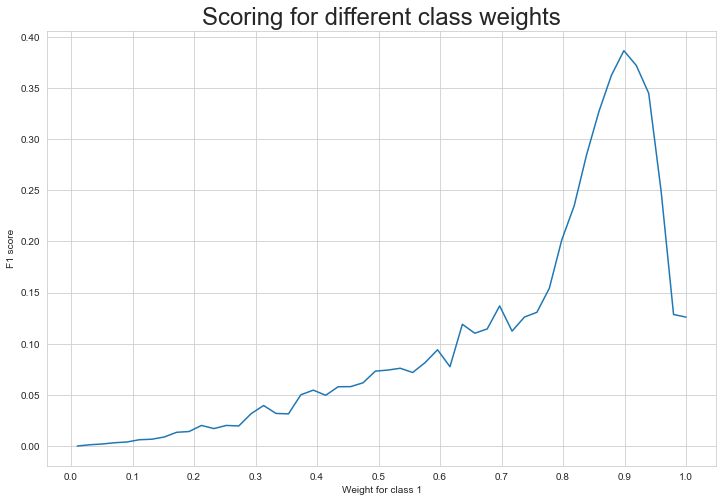

In [38]:
LogisticReg = LogisticRegression(solver='lbfgs')

#Setting the range for class weights
weights = np.linspace(0.0,0.99,50)

#Creating a  dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting the grid search value to the train data with 5 folds
gridsearch = GridSearchCV(estimator= LogisticReg, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(X_train_new, y_train_new)

#Ploting the result score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)


### Based on the above graph, Class 1 can be given weight : .89 and Class 0 can be given weight : 11
        

In [39]:
#re-train using new class weight and evaluate 

#### (i)  Retrain the model using class weight - Base Model (Model 1)


In [40]:
lg_wa_base = LogisticRegression(random_state=42, solver='lbfgs', max_iter=200,
                                         class_weight={0: 0.11, 1: 0.89})
lg_wa_base.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.11, 1: 0.89}, max_iter=200,
                   random_state=42)

In [41]:
#test data accuracy 
y_pred_test_wa_base = lg_wa_base.predict(X_test)
#confusion matrix 
conf_matrix_test_wa_base = metrics.confusion_matrix(y_test, y_pred_test_wa_base)
print("confusion matrix \n",conf_matrix_test_wa_base)
print("Accuracy : %.2f" % metrics.accuracy_score(y_test, y_pred_test_wa_base))
print("Precisison : %.2f" % metrics.precision_score(y_test, y_pred_test_wa_base))
print("Recall : %.2f" % metrics.recall_score(y_test, y_pred_test_wa_base))
print("F1 score : %.2f" % metrics.f1_score(y_test, y_pred_test_wa_base))

confusion matrix 
 [[26627  1417]
 [ 1235   721]]
Accuracy : 0.91
Precisison : 0.34
Recall : 0.37
F1 score : 0.35


#### (i)  Retrain the model using class weight - New Model (Model 2)

In [42]:
lg_wa_new = LogisticRegression(random_state=42, solver='lbfgs', max_iter=200,
                                         class_weight={0: 0.11, 1: 0.89})
lg_wa_new.fit(X_train_new, y_train_new)

LogisticRegression(class_weight={0: 0.11, 1: 0.89}, max_iter=200,
                   random_state=42)

In [43]:
#test data accuracy 
y_pred_test_wa_new = lg_wa_new.predict(X_test_new)
#confusion matrix 
conf_matrix_test_wa_new = metrics.confusion_matrix(y_test_new, y_pred_test_wa_new)
print("confusion matrix \n",conf_matrix_test_wa_new)
print("Accuracy : %.2f" % metrics.accuracy_score(y_test_new, y_pred_test_wa_new))
print("Precisison : %.2f" % metrics.precision_score(y_test_new, y_pred_test_wa_new))
print("Recall : %.2f" % metrics.recall_score(y_test_new, y_pred_test_wa_new))
print("F1 score : %.2f" % metrics.f1_score(y_test_new, y_pred_test_wa_new))

confusion matrix 
 [[27043  1001]
 [ 1244   712]]
Accuracy : 0.93
Precisison : 0.42
Recall : 0.36
F1 score : 0.39


## Step 5: Recommend the Best Model and Explain the Reasons

# Enter your answer here:
New Model (or Model 2) with the selected features is recommended due to the following reasons:
1. New Model (or Model 2) gives better accuracy than the base model.  Especially, F1 score of Model 2 is much better than Model 1
2. New Model (or Model 2) use only cherry-picked features but model 1 use all the features. 

Hence, New Model ( or Model 2) is recommended. 


## Step 6: Save the Best Model for Future Use

In [44]:
# Enter your code here:
modelFile = "logistic_regression_model.pkl"
joblib.dump(lg_new, modelFile )

['logistic_regression_model.pkl']

 
 
## <center>End of Assignment<center>
---